# Building permits exercise

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

permit = pd.read_csv('../data/external/Building_Permits.csv', low_memory=False)

## Basic info on the `Building Permits` dataframe

In [51]:
pd.options.display.max_columns = 50
permit.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [52]:
print("Shape:", permit.shape)
total = np.product(permit.shape)
print("Number of overall data:", total)

Shape: (198900, 43)
Number of overall data: 8552700


---
## Non-missing values
#### Number of non-missing data

In [53]:
non_missing_total = permit.notnull().sum().sum()
print("Number of overall non-missing data:", non_missing_total)

Number of overall non-missing data: 6306759


In [54]:
non_missing_count = permit.count()
non_missing_count

Permit Number                             198900
Permit Type                               198900
Permit Type Definition                    198900
Permit Creation Date                      198900
Block                                     198900
Lot                                       198900
Street Number                             198900
Street Number Suffix                        2216
Street Name                               198900
Street Suffix                             196132
Unit                                       29479
Unit Suffix                                 1961
Description                               198610
Current Status                            198900
Current Status Date                       198900
Filed Date                                198900
Issued Date                               183960
Completed Date                             97191
First Construction Document Date          183954
Structural Notification                     6922
Number of Existing S

#### Information on non-missing values

In [55]:
non_missing_info = permit.info()
non_missing_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

---
## Missing values
#### Check if there are any missing values in the data

In [56]:
missing = permit.isnull()
missing.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,True,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,True,False,False,True,True,True,False,False,False,False,False


#### Overall missing data

In [57]:
missing_total = np.count_nonzero(missing)
print("Number of overall missing data:", missing_total)

Number of overall missing data: 2245941


#### Number of missing values in each field

In [58]:
missing_count = missing.sum()
missing_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

#### Ratio of missing values

In [59]:
missing_count / len(permit)

Permit Number                             0.000000
Permit Type                               0.000000
Permit Type Definition                    0.000000
Permit Creation Date                      0.000000
Block                                     0.000000
Lot                                       0.000000
Street Number                             0.000000
Street Number Suffix                      0.988859
Street Name                               0.000000
Street Suffix                             0.013917
Unit                                      0.851790
Unit Suffix                               0.990141
Description                               0.001458
Current Status                            0.000000
Current Status Date                       0.000000
Filed Date                                0.000000
Issued Date                               0.075113
Completed Date                            0.511357
First Construction Document Date          0.075143
Structural Notification        

#### Percent of total values missing

In [60]:
missing_percentage_total = (missing_total / total) * 100
print('Percent of total values missing: {:.2f}%'.format(missing_percentage_total))

Percent of total values missing: 26.26%


#### Percent of values missing in each field

In [61]:
missing_percentage = permit.isnull().mean().round(4) * 100
missing_percentage.sort_values()

Permit Number                               0.00
Filed Date                                  0.00
Current Status Date                         0.00
Current Status                              0.00
Street Name                                 0.00
Street Number                               0.00
Record ID                                   0.00
Block                                       0.00
Permit Creation Date                        0.00
Permit Type Definition                      0.00
Permit Type                                 0.00
Lot                                         0.00
Description                                 0.15
Location                                    0.85
Zipcode                                     0.86
Supervisor District                         0.86
Neighborhoods - Analysis Boundaries         0.87
Street Suffix                               1.39
Revised Cost                                3.05
Issued Date                                 7.51
First Construction D

## Q. For the different types of missing values, infer why you think they are missing? Why could they be missing?

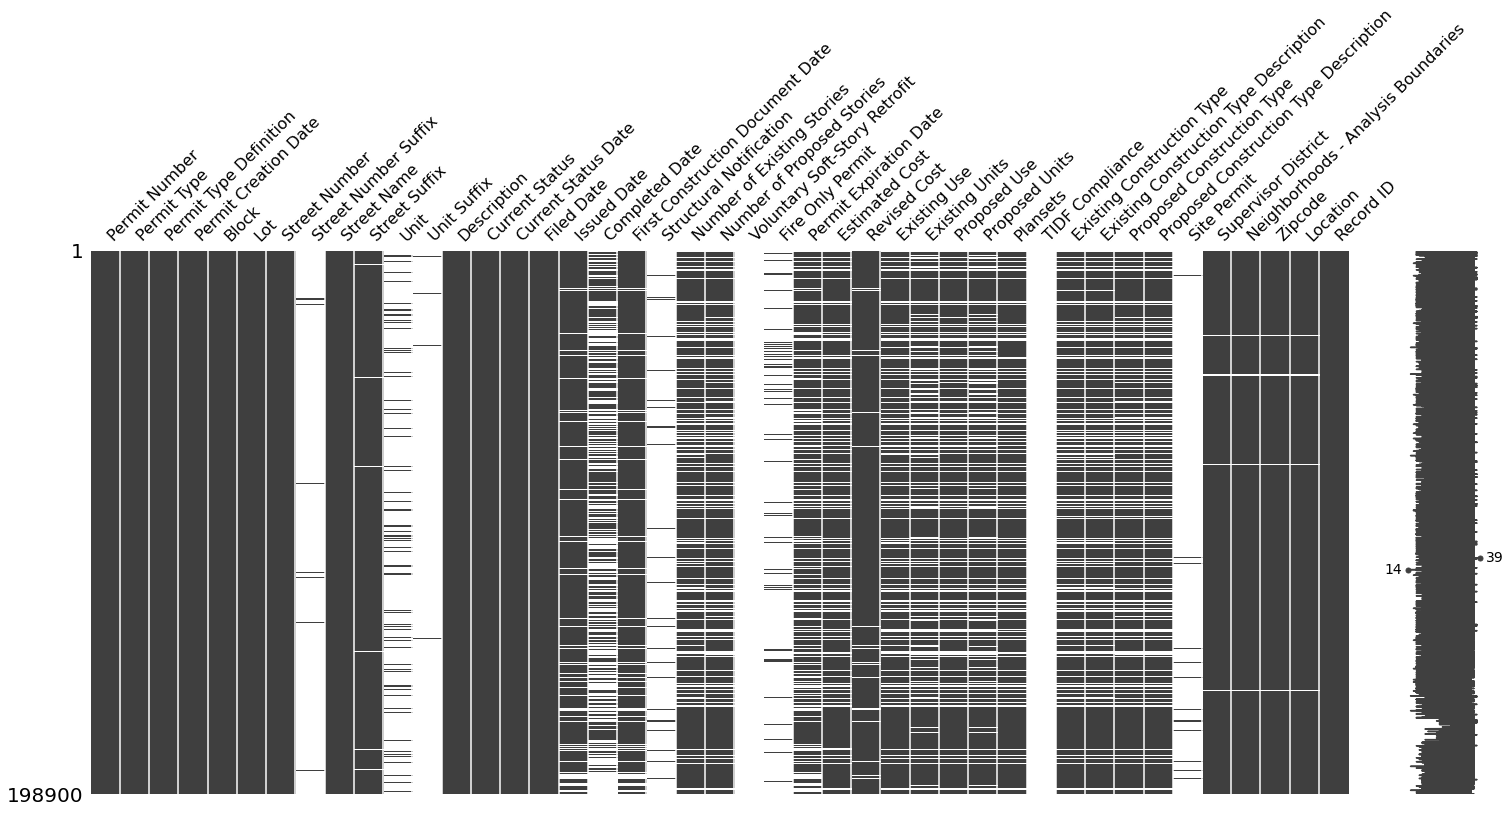

In [62]:
%matplotlib inline
msno.matrix(permit)
plt.show()

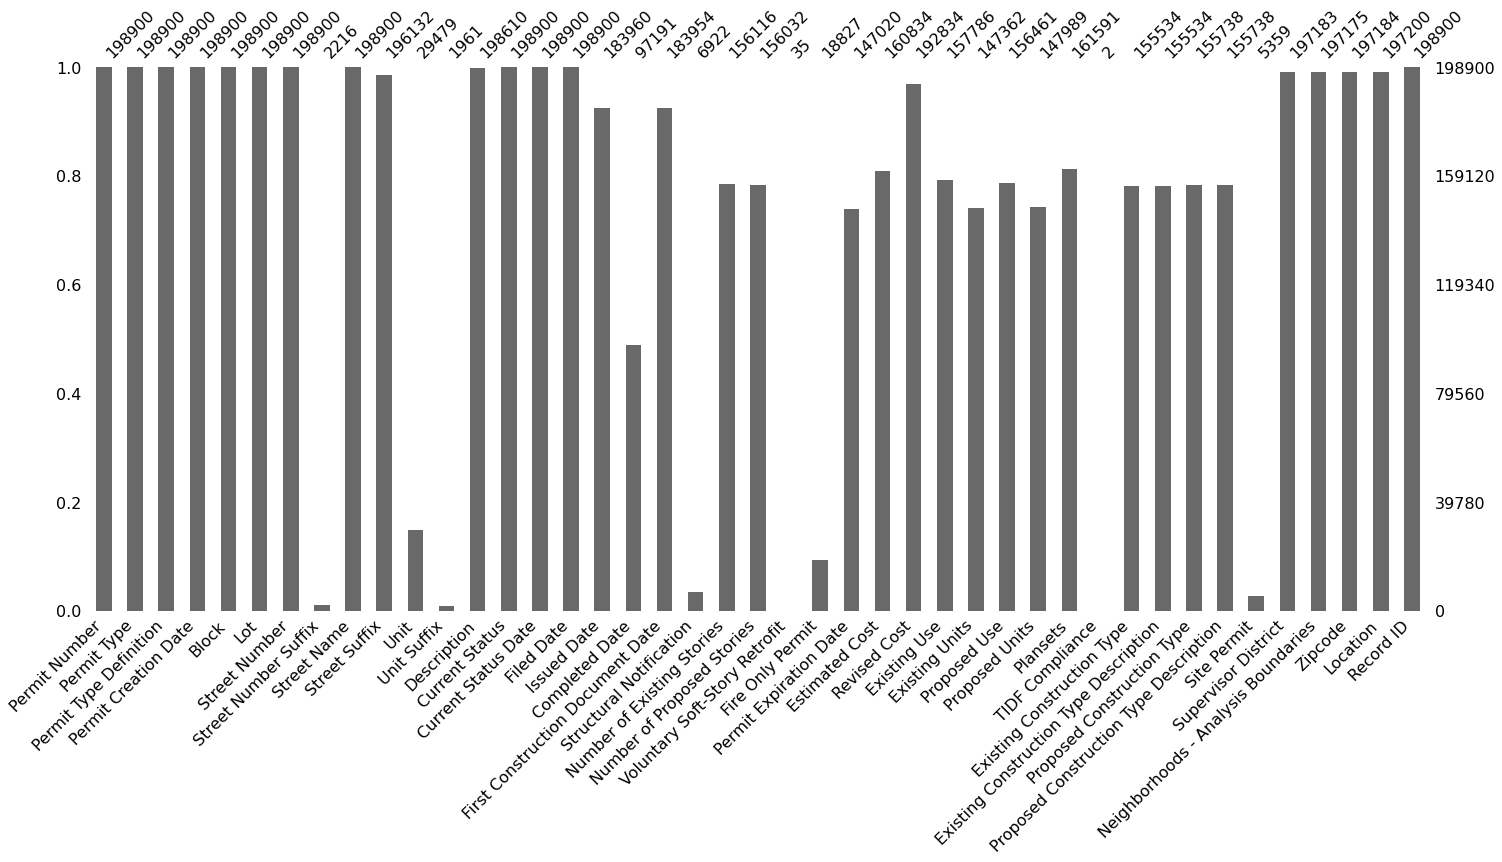

In [63]:
%matplotlib inline
msno.bar(permit)
plt.show()

<AxesSubplot:>

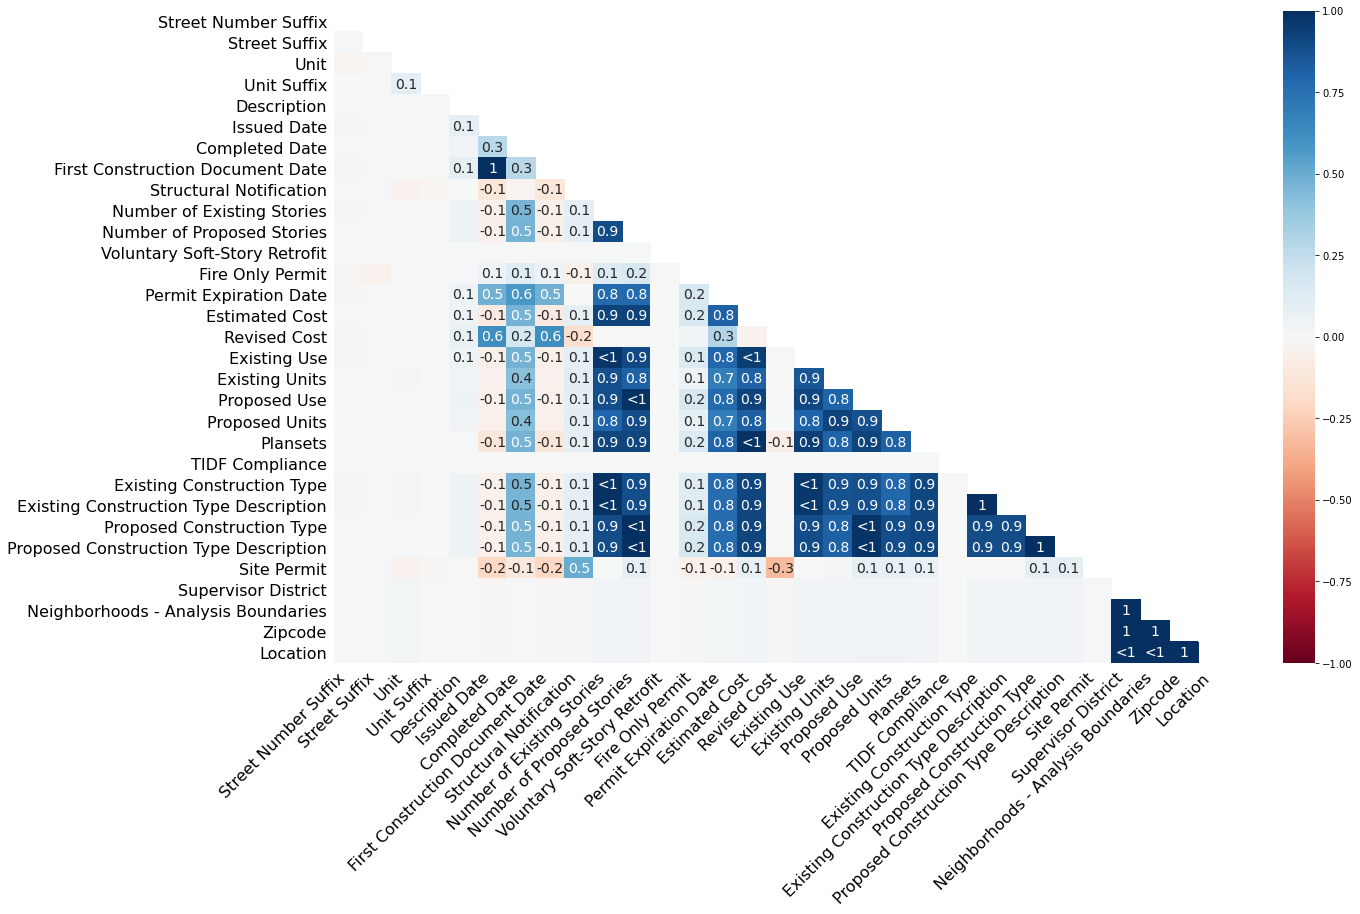

In [64]:
%matplotlib inline
msno.heatmap(permit)


__Information does not exist__

1. According to the heat map, it seems like below items are related to the `Number of Existing Stories`, as they are quite proportionally missing values as `Number of Existing Stories` does. The `Number of Existing Stories` values were missing as they do not exist. Therefore, values that are related to `Number of Existing Stories` follows the reasoning. 

(`Number of Proposed Stories`, `Estimated Cost`, `Existing Use`, `Proposed Use`, `Proposed Units`, `Plansets`, `Existing Construction Type`, `Existing Construction Type Description`, `Proposed Construction Type`, `Proposed Construction Type Description`)


2. Not every building has `Unit`, `Unit Suffix`, or `Street Number Suffix`.

3. `Issued Date`: Has a permit but not issued yet?

4. `Structural Notification`, `Voluntary Soft-Story Retrofit`

5. `Location`: Mostly street location. There is no specific data for this. 

6. `Existing Units`: No existing units at the time

7. `TIDF Compliance`: It's a new legal requirement. No one has it yet.

</br>

__Was not recorded, and important__

1. `First Construction Document Date`, 

2. `Revised Cost`: Negative impact on Plansets and Site permit.

3. `Supervisor District`: Related information of `Location`, `Zipcode`, `Neighborhoods` are not recorded yet.

4. `Permit Expiration Date`

</br>

__Was not recorded, but not important__

1. `Description`

2. `Zipcode`

In [65]:
permit[permit['Existing Units'].isnull()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,NaN,NaN,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,NaN,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,NaN,NaN,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,NaN,07/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,NaN,NaN,street space,issued,07/06/2017,07/06/2017,07/06/2017,NaN,07/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198890,201711274822,3,additions alterations or repairs,11/27/2017,3803,001,185,NaN,Berry,St,NaN,NaN,"1st flr: suite 1000, construction of primary a...",filed,11/27/2017,11/27/2017,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,750000.0,750000.0,office,NaN,office,NaN,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,NaN,NaN,NaN,NaN,1488352388160
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,NaN,NaN,street space,issued,12/05/2017,12/05/2017,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,NaN,NaN,street space,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,NaN,NaN,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


## Q. What happens if you were to drop all missing values? Is this a good option?

__1) Drop columns with missing values__

In [ ]:
cols_with_missing = [col for col in permit.columns
                                 if permit[col].isnull().any()]
reduced_original = permit.drop(cols_with_missing, axis=1)

reduced_original

In [ ]:
permit_no_missing = reduced_original.isnull()
permit_no_missing.head()

Check if any missing data still exists

In [ ]:
permit_dropped_column = permit.dropna(axis=1)
print("Number of columns with missing values dropped: %d" % permit_dropped_column.shape[1])


There will be only 12 columns left if column

## Q. Fill in all missing values using at least two methods.

#### 1) Filling with average for NaN
This is a bad practice as it will shift the normal curve to mean value

In [ ]:
permit.fillna(permit.mean())

#### 2) Imputation

Q. What should apporpriate value be in the context of my data? 

In [70]:
# SimpleImputer = SimpleImputer(missing_values=np.nan, strategy="mean")
KNNimputer = KNNImputer(n_neighbors=5)
scaler = MinMaxScaler()

permit.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [71]:
permit_objects = permit.loc[:, permit.dtypes == np.object]

In [72]:
permit_imputed = permit.drop(permit.loc[:, permit.dtypes == np.object], axis=1)
permit_imputed = pd.DataFrame(scaler.fit_transform(permit_imputed), columns = permit_imputed.columns)
permit_imputed.head()


,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
0,0.428571,0.016667,NaN,0.076923,NaN,0.000007,5.124920e-06,0.074987,NaN,0.000222,0.5,NaN,0.2,0.000,0.920742
1,0.428571,0.052381,0.0,0.089744,NaN,0.000000,6.406150e-07,NaN,NaN,0.000222,0.5,NaN,0.2,0.000,0.947369
2,0.285714,0.196071,NaN,0.076923,0.076923,0.000037,NaN,0.020451,0.020408,0.000222,0.0,0.0,0.2,0.125,0.950528
3,1.000000,0.146429,0.0,0.025641,0.025641,0.000004,2.562460e-06,0.000524,0.000523,0.000222,1.0,1.0,0.2,0.125,0.963129
4,0.714286,0.113095,NaN,0.038462,NaN,0.000186,1.281230e-04,NaN,NaN,0.000222,0.5,NaN,0.5,0.000,0.088604


In [ ]:
permit_imputed = pd.DataFrame(KNNimputer.fit_transform(permit_imputed), columns = permit_imputed.columns)

In [ ]:
permit_imputed[permit_objects.columns] = permit.loc[:, permit.dtypes == np.object]

permit_imputed

## Q. What statistical impact does filling this data have on averages, standard deviations, and correlations between data?

Depends on how we fill the data, but the most impact will be done from filling the fields that weren't recorded but important places. The fields that were NaNs because they do not exist do not have much impact on the dataset. They were meant to be not available data. However, when the data were not recorded by mistake or in accident, they will impact the analysis of the data by filling them with imputation. As I performed the mean imputation, it reduced the variance of the imputed variables, which shrinked standard errors. This lead to invalidating the calculation of confidence interval and did not preserve correlations between data.

In [ ]:
permit.hist(figsize=(15,15))
plt.show()


In [ ]:
permit_imputed.hist(figsize=(15,15))
plt.show()